<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span><ul class="toc-item"><li><span><a href="#How-to-faltten" data-toc-modified-id="How-to-faltten-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How to faltten</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modelling-4-species" data-toc-modified-id="Modelling-4-species-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling 4 species</a></span><ul class="toc-item"><li><span><a href="#Get-data-for-4-species-only" data-toc-modified-id="Get-data-for-4-species-only-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get data for 4 species only</a></span></li><li><span><a href="#Naive-Bayes-model" data-toc-modified-id="Naive-Bayes-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Naive Bayes model</a></span></li><li><span><a href="#Decision-Tree-model" data-toc-modified-id="Decision-Tree-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Decision Tree model</a></span></li></ul></li><li><span><a href="#Building-a-simple-CNN" data-toc-modified-id="Building-a-simple-CNN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building a simple CNN</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#convert-categories-to-numeric" data-toc-modified-id="convert-categories-to-numeric-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>convert categories to numeric</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Normalization</a></span></li></ul></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Building the network</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw


from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Get the data

In [2]:
all_pics = np.empty(0)
all_pics

array([], dtype=float64)

In [3]:
def import_pics(base_path):
    all_pics = list()
    all_labels = list()
    for species in os.listdir(base_path):
        for tmp_pic in os.listdir(base_path+species):
            all_labels.append(species)
            all_pics.append(np.array(Image.open(base_path+species+"/"+tmp_pic)))
    return np.array(all_pics), np.array(all_labels)

In [4]:
base_path = r'data/200_species_train/'
X_train, y_train = import_pics(base_path)

In [5]:
len(X_train), len(y_train)

(27503, 27503)

In [6]:
base_path = r'data/200_species_valid/'
X_val, y_val = import_pics(base_path)

In [7]:
len(X_val), len(y_val)

(1000, 1000)

## How to faltten

In [8]:
flat_X_train = np.array([x.flatten() for x in X_train])

In [9]:
X_train.shape

(27503, 224, 224, 3)

In [10]:
flat_X_train.shape

(27503, 150528)

# EDA

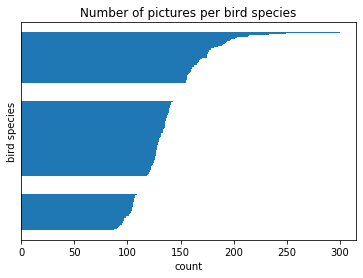

In [11]:
birds_counts = pd.DataFrame(np.unique(y_train,return_counts=True)).T.sort_values(by=1)
plt.barh(birds_counts[0],birds_counts[1]);
plt.yticks([]);
plt.ylabel("bird species")
plt.xlabel("count")
plt.title("Number of pictures per bird species")
plt.show;

In [12]:
all_species = np.unique(y_train)

In [13]:
all_species[:4]

array(['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET',
       'AMERICAN AVOCET'], dtype='<U25')

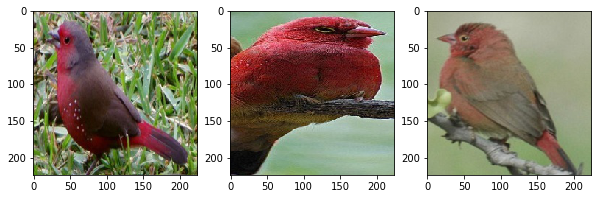

In [14]:
f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[0])
ax[1].imshow(X_train[1])
ax[2].imshow(X_train[2]);

Already I see an issue here. The second picture looks kind of skweshed. How can we identify those, and should we filter them out?

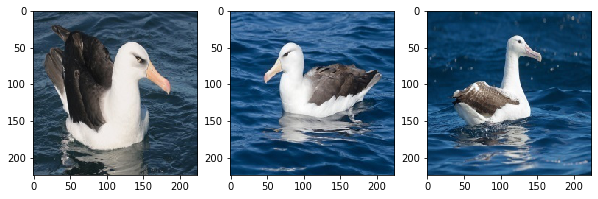

In [15]:
inds = np.where(y_train == all_species[1])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[2].imshow(X_train[inds[2]]);

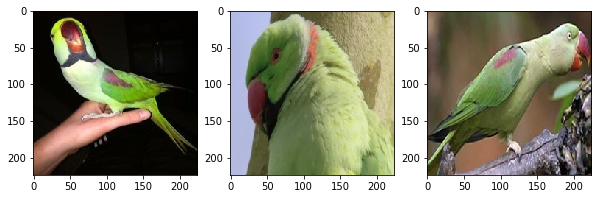

In [16]:
inds = np.where(y_train == all_species[2])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[2].imshow(X_train[inds[2]]);

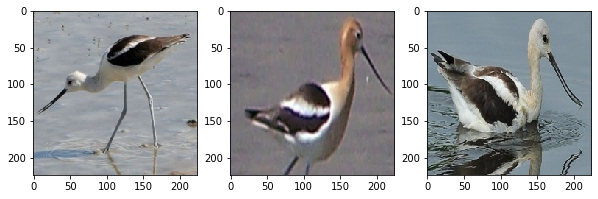

In [17]:
inds = np.where(y_train == all_species[3])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[2].imshow(X_train[inds[2]]);

# Modelling 4 species

## Get data for 4 species only

In [18]:
inds_4testing = range(581)

In [34]:
sub_y = y_train[inds_4testing]
sub_y_val = y_val[:20]

In [35]:
pd.Series(sub_y).value_counts()

AMERICAN AVOCET         179
ALEXANDRINE PARAKEET    165
AFRICAN FIREFINCH       140
ALBATROSS                97
dtype: int64

In [36]:
pd.Series(sub_y_val).value_counts()

AFRICAN FIREFINCH       5
AMERICAN AVOCET         5
ALBATROSS               5
ALEXANDRINE PARAKEET    5
dtype: int64

In [21]:
sub_X = X_train[inds_4testing]

In [22]:
sub_X.shape

(581, 224, 224, 3)

In [31]:
sub_X_flat = np.array([x.flatten() for x in sub_X])
sub_X_val = np.array([x.flatten() for x in X_val[:20]])

In [32]:
sub_X_flat.shape, sub_X_val.shape

((581, 150528), (20, 150528))

## Naive Bayes model

In [26]:
nbc = BernoulliNB(binarize=0)
nbc.fit(sub_X_flat,sub_y)

BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

In [27]:
pred_sub = nbc.predict(sub_X_flat)

In [28]:
print("accuracy is",round(metrics.accuracy_score(sub_y,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y,pred_sub,average='weighted'),3))
pd.DataFrame(metrics.confusion_matrix(sub_y,pred_sub),index=np.unique(sub_y),columns=np.unique(sub_y))

accuracy is 0.427
average recall is 0.427
average precision is 0.743


,AFRICAN FIREFINCH,ALBATROSS,ALEXANDRINE PARAKEET,AMERICAN AVOCET
AFRICAN FIREFINCH,20,0,1,119
ALBATROSS,0,10,2,85
ALEXANDRINE PARAKEET,0,1,42,122
AMERICAN AVOCET,1,0,2,176


That's all fucked up. we can see by the confusion matrix that most of the pictures were classified as **AMERICAN AVOCET**.

Is this because its value is three so the weight of it is higher?

## Decision Tree model

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(sub_X_flat,sub_y)

pred_sub = dtc.predict(sub_X_flat)

In [27]:
print("accuracy is",round(metrics.accuracy_score(sub_y,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y,pred_sub,average='weighted'),3))
pd.DataFrame(metrics.confusion_matrix(sub_y,pred_sub),index=np.unique(sub_y),columns=np.unique(sub_y))

accuracy is 1.0
average recall is 1.0
average precision is 1.0


,AFRICAN FIREFINCH,ALBATROSS,ALEXANDRINE PARAKEET,AMERICAN AVOCET
AFRICAN FIREFINCH,140,0,0,0
ALBATROSS,0,97,0,0
ALEXANDRINE PARAKEET,0,0,165,0
AMERICAN AVOCET,0,0,0,179


In [37]:
pred_val = dtc.predict(sub_X_val)

In [39]:
print("accuracy is",round(metrics.accuracy_score(sub_y_val,pred_val),3))
print("average recall is",round(metrics.recall_score(sub_y_val,pred_val,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y_val,pred_val,average='weighted'),3))
pd.DataFrame(metrics.confusion_matrix(sub_y_val,pred_val),index=np.unique(pred_val),columns=np.unique(pred_val))

accuracy is 0.4
average recall is 0.4
average precision is 0.335


,AFRICAN FIREFINCH,ALBATROSS,ALEXANDRINE PARAKEET,AMERICAN AVOCET
AFRICAN FIREFINCH,1,0,4,0
ALBATROSS,3,0,1,1
ALEXANDRINE PARAKEET,1,1,3,0
AMERICAN AVOCET,1,0,0,4


# Building a simple CNN 

## Preparing the data

- convert categories to numeric.
- normalization.

### convert categories to numeric

In [40]:
from keras.utils import to_categorical

train_y_cat = np.array(pd.get_dummies(sub_y))
print("The shape of the train labels is",train_y_cat.shape)
train_y_cat

Using TensorFlow backend.


The shape of the train labels is (581, 4)


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [41]:
sub_X_val = X_val[:20]
sub_X_val.shape

(20, 224, 224, 3)

In [42]:
val_y_cat = np.array(pd.get_dummies(y_val[:20]))
val_y_cat

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

### Normalization

In [43]:
sub_X = sub_X / np.max(sub_X)
sub_X_val = sub_X_val / np.max(sub_X_val)

## Building the network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [45]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      18464     
_________________________________________________________________
flatten (Flatten)            (None, 1548800)           0         
_________________________________________________________________
dense (Dense)                (None, 4)                 6195204   
Total params: 6,215,460
Trainable params: 6,215,460
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(sub_X, train_y_cat, batch_size=128, validation_data=(sub_X_val, val_y_cat), epochs=1) 

Train on 581 samples, validate on 20 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10


In [ ]:
model.history.history